#*Universidad Comunera - Maestría en Ciencia de Datos*  
**Alumno:** Nicolas Canese

**Objetivo General:**   
Analizar el desempeño de arquitecturas de redes
neuronales para clasificación.  
**Objetivo Específicos:**  
• Analizar Arrhythmia Data Set para clasificación:
https://archive.ics.uci.edu/ml/datasets/Arrhythmia  
• Seleccionar tres arquitecturas de redes neuronales en scikit learn.  
• Implementar un esquema de entrenamiento y comparación de las redes.  
• Reportar en un documento técnico el código y los resultados de las pruebas

#Importando librerías y cargando los datos:

In [ ]:
from google.colab import drive
import csv
import pandas as pd
import io
import os
import numpy as np
import sklearn as skn
drive.mount('/content/drive', force_remount=True)

# Leemos el .data
data_file_path =  'https://drive.google.com/uc?id=1v0dbvDYcuj9MAq8ZT0RtV-_UgRZpAIOR'
data_df = pd.read_csv(data_file_path, sep=';', header=None)

# Leemos el archivo con los nombres de las columnas
name_file_path = 'https://drive.google.com/uc?id=124U7iI8ut5k0XRTbjhN0h6yaLiMAhVwv'
name_df = pd.read_csv(name_file_path, sep =';', header=None)

#cambiar el nombre de las columnas y valores faltantes
data_df.columns = name_df.iloc[:, 0].tolist()
data_df.replace('446544', np.nan, inplace=True)
data_df.dropna(inplace=True)

#Visualizamos la forma de la tabla y un resumen estadístico de las
print(data_df.shape)
data_df

Mounted at /content/drive
(452, 280)


,1 Age,2 Sex,3 Height,4 Weight,5 QRS duration,6 P-R interval,7 Q-T interval,8 T interval,9 P interval,10 QRS,...,channel_271,channel_272,channel_273,channel_274,channel_275,channel_276,channel_277,channel_278,channel_279,arrhythmia_type
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


# Analizando datos del dataset:

In [ ]:
'''Visualizamos la forma de la tabla,
los valores únicos de los tipos de arritmia con la cuenta de apariciones
en el dataset y un resumen estadístico de algunas dimensiones'''
print(data_df.shape)
print(np.unique(data_df.iloc[:, -1].values, return_counts=True))
data_df.describe()

(452, 280)
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16]), array([245,  44,  15,  15,  13,  25,   3,   2,   9,  50,   4,   5,  22]))


,1 Age,2 Sex,3 Height,4 Weight,5 QRS duration,6 P-R interval,7 Q-T interval,8 T interval,9 P interval,10 QRS,...,channel_271,channel_272,channel_273,channel_274,channel_275,channel_276,channel_277,channel_278,channel_279,arrhythmia_type
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# Arquitecturas:

Probamos estas tres arquitecturas diferentes de Redes neuronales:

[Multi-layer Perceptron (MLP)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.fit)



[Extreme learning machine (ELM)](https://pypi.org/project/scikit-elm/#description
)



[DeepInsight (CNN for non-image data)](https://github.com/alok-ai-lab/pyDeepInsight)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Separando los datos en variables predictoras y variables predictivas
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

#Separando un 20% de los datos para el test y el 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Red Neuronal 1: Multi-layer Perceptron (MLP)

In [ ]:
#librerías a importar
from sklearn.neural_network import MLPClassifier

#Configuración del modelo
mlp = make_pipeline(StandardScaler(with_mean=False),MLPClassifier(
                      hidden_layer_sizes=(100, 100),solver='lbfgs',
                      random_state=42,  alpha=1e-5,verbose=1))
mlp.out_activation_ = 'softmax'

#Corremos el modelo
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

#Analizando performance
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = np.nan_to_num(precision_score(y_test, mlp_pred, average='weighted',
                                        zero_division=0))
mlp_recall = np.nan_to_num(recall_score(y_test, mlp_pred, average='weighted',
                                        zero_division=0))

# Red Neuronal 2: Extreme learning machine (ELM)

In [ ]:
#librerías a importar e instalar
#!pip install scikit-elm
from skelm import ELMClassifier

#Configuración del modelo
elm = make_pipeline(RobustScaler(),ELMClassifier(alpha=0.8,n_neurons=3000,
                                                 ufunc='tanh',random_state=30))
#Corriendo el modelo con los datos
elm.fit(X_train, y_train)
elm_pred= elm.predict(X_test)

#Midiendo la performance
elm_accuracy = accuracy_score(y_test, elm_pred)
elm_precision = np.nan_to_num(precision_score(y_test, elm_pred,
                                        average='weighted', zero_division=1))
elm_recall = np.nan_to_num(recall_score(y_test, elm_pred,
                                        average='weighted', zero_division=0))

# Red Neuronal 3: DeepInsight

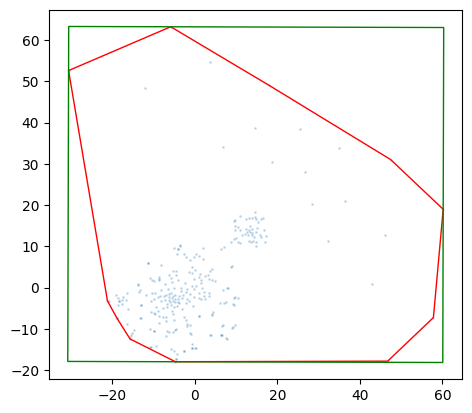

[0] loss: 1.814
[10] loss: 1.494
[20] loss: 1.309
[30] loss: 1.090
[40] loss: 1.053
[49] loss: 0.735


In [ ]:
# Librerías a importar e instalar
#!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 torchdata==0.5.1 torchtext==0.14.1 torchcam grad_cam
#!pip -q install git+https://github.com/alok-ai-lab/pyDeepInsight.git#egg=pyDeepInsight
from pyDeepInsight import ImageTransformer
from pyDeepInsight.utils import Norm2Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

#Normalizando los datos
ln = Norm2Scaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = np.unique(y_train_enc).size

#Creamos un objeto TSNE
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    init='random',
    learning_rate='auto',
    n_jobs=-1
)

#Transformacion en imagen con DeepInsight
pixel_size = (227,227)
it = ImageTransformer(
    feature_extractor=reducer,
    pixels=pixel_size)

#Corremos el modelo
it.fit(X_train, y=y_train, plot=True)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

#Utilizamos Torch para las CNN
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import warnings;
warnings.simplefilter('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

#Configuración del modelo con pytorch
model = torchvision.models.squeezenet1_1(weights='DEFAULT')
model.classifier.append(nn.Flatten())
_ = model.classifier.append(nn.Linear(1000, num_classes))

preprocess = transforms.Compose([
    transforms.ToTensor()
])

X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float()
y_train_tensor = torch.from_numpy(le.fit_transform(y_train))

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float()
y_test_tensor = torch.from_numpy(le.transform(y_test))


batch_size = 16

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

criterion = nn.NLLLoss()
m = nn.LogSoftmax(dim=1)
optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-04,
    #momentum=0.8,
    weight_decay=1e-05
)

model.train()
model.to(device)
for epoch in range(50): #A más epocas, más procesamiento

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(m(outputs), labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # Mostramos el dato de pérdida de las épocas
    if not (epoch % 10):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')

model.to('cpu')
model = model.eval()
with torch.no_grad():
    y_hat = model(X_train_tensor)
train_predicted = torch.max(y_hat, 1)[1]
with torch.no_grad():
    y_hat = model(X_test_tensor)
test_predicted = torch.max(y_hat, 1)[1]

#Analizamos la performance del modelo
cnn_accuracy=accuracy_score(train_predicted, y_train_tensor)

cnn_precision=precision_score(train_predicted, y_train_tensor, average='weighted'
,zero_division=0)

cnn_recall=recall_score(train_predicted, y_train_tensor,average='weighted'
,zero_division=0)



# Comparando resultados


In [ ]:
# Comparamos la performance de los modelos
resultados = pd.DataFrame({
    'Modelo': ['Multi-layer Perceptron (MLP)', 'Extreme Learning machine (ELM)',
              'DeepInsight (CNN)'],
    'Accuracy': [mlp_accuracy, elm_accuracy,cnn_accuracy],
    'Precision': [mlp_precision, elm_precision,cnn_precision],
    'Recall': [mlp_recall, elm_recall,cnn_recall]
})
print(resultados)

                            Model  Accuracy  Precision    Recall
0    Multi-layer Perceptron (MLP)  0.516484   0.512678  0.516484
1  Extreme Learning machine (ELM)  0.483516   0.530751  0.483516
2               DeepInsight (CNN)  0.786704   0.921674  0.786704
